In [ ]:
import sklearn
from packaging import version

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [2]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
data_root = "https://github.com/ageron/data/raw/main/lifesat/lifesat.csv"
data = pd.read_csv(data_root)
data.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


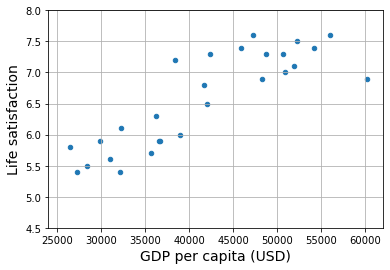

In [5]:
X = data[['GDP per capita (USD)']].to_numpy()
y = data[['Life satisfaction']].to_numpy()
data.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([24_000, 62_000, 4.5, 8]);

In [6]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
X_test = np.array([25_000, 61_000]).reshape(-1,1)
y_pred = model.predict(X_test)
y_pred

array([[5.44377435],
       [7.88417824]])

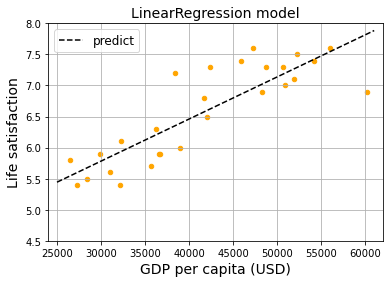

In [8]:
data.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y="Life satisfaction", c='orange')
plt.plot(X_test, y_pred, c='black', linestyle='--', label='predict')
plt.title("LinearRegression model")
plt.axis([24_000, 62_000, 4.5, 8])
plt.legend();

> what is n_neighbors : 

In [9]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
model.predict(X_test)

array([[5.56666667],
       [7.3       ]])

In [10]:
import os

BASE_PATH = "plot_images"
os.makedirs(BASE_PATH, exist_ok=True)
def save_fig(name: str, extension="jpg", resolution=300) :
    """save plot image"""
    path = f'{BASE_PATH}/{name}.{extension}'
    plt.savefig(path, format=extension, dpi=resolution)

In [11]:
import urllib.request

DATAPATH = 'datasets'
os.makedirs(DATAPATH, exist_ok=True)
data_root = "https://github.com/ageron/data/raw/main/"
filenames = ["oecd_bli.csv", "gdp_per_capita.csv"]
for filename in filenames :
    filepath = os.path.join(DATAPATH, filename)
    if not os.path.isfile(filepath) :
        print(f"Downloading : {filename}")
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url=url, filename=filepath)

In [12]:
oecd_bli = pd.read_csv(f'{DATAPATH}/oecd_bli.csv')
gdp_per_capita = pd.read_csv(f'{DATAPATH}/gdp_per_capita.csv')

In [13]:
gdp_year = 2020
gdp_at_year = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_at_year = gdp_per_capita.drop(['Code', 'Year'], axis=1)
gdp_at_year.columns

Index(['Entity', 'GDP per capita, PPP (constant 2017 international $)'], dtype='object')

In [14]:
gdp_at_year.columns = ['Country', 'GDP per capita (USD)'] # re column name
gdp_at_year = gdp_at_year.groupby('Country').mean()
gdp_at_year

,GDP per capita (USD)
Country,
Afghanistan,1755.250894
Africa Eastern and Southern,3025.271927
Africa Western and Central,3324.486598
Albania,8264.789644
Algeria,9920.676960
...,...
Vanuatu,2952.607100
Vietnam,4279.099478
World,12682.336851


> .pivot

<img src="https://www.w3resource.com/w3r_images/pandas-dataframe-pivot-1.svg"/>

In [15]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT' ]
oecd_bli.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [16]:
oecd_bli = oecd_bli.pivot(index="Country", columns='Indicator', values='Value')
oecd_bli.head(10)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [17]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_at_year, left_index=True, right_index=True)
full_country_stats.sort_values(by='GDP per capita (USD)', inplace=True)
full_country_stats = full_country_stats[['GDP per capita (USD)', 'Life satisfaction']]
full_country_stats.index.name = 'Country'
full_country_stats.head(10)

,GDP per capita (USD),Life satisfaction
Country,,
Colombia,10961.897571,6.3
South Africa,11250.144917,4.7
Brazil,12921.597170,6.4
Mexico,17540.785999,6.5
Chile,18469.010293,6.5
Turkey,19042.145097,5.5
Poland,20224.537857,6.1
Russia,20443.107913,5.8
Latvia,20629.437272,5.9


In [18]:
min_gdp, max_gdp = 13_000, 65_000
country_stats = full_country_stats[(full_country_stats['GDP per capita (USD)'] >= min_gdp) & (full_country_stats['GDP per capita (USD)'] <= max_gdp)]
country_stats.head(10)

,GDP per capita (USD),Life satisfaction
Country,,
Mexico,17540.785999,6.5
Chile,18469.010293,6.5
Turkey,19042.145097,5.5
Poland,20224.537857,6.1
Russia,20443.107913,5.8
Latvia,20629.437272,5.9
Hungary,22955.389225,5.6
Lithuania,23217.150876,5.9
Estonia,25644.636566,5.7


In [19]:
country_stats.to_csv(f'{DATAPATH}/country_stats.csv')

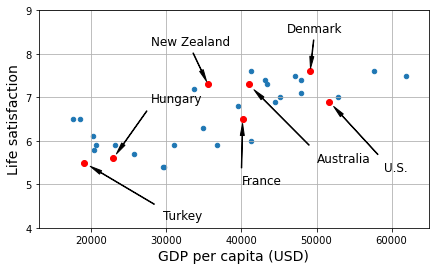

In [20]:
max_life_sat = 9
min_life_sat = 4
country_stats.plot(kind='scatter', figsize=(7,4), grid=True, x='GDP per capita (USD)', y='Life satisfaction')
position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}
for country, pos_text in position_text.items() :
    pos_data_x = country_stats['GDP per capita (USD)'].loc[country]
    pos_data_y = country_stats['Life satisfaction'].loc[country]
    country = 'U.S.' if country == 'United States' else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.08, headwidth=4))
    plt.plot(pos_data_x, pos_data_y, 'ro')

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
save_fig(name='GDP vs Life satisfaction')

In [21]:
from sklearn import linear_model

X_sample = country_stats[['GDP per capita (USD)']].to_numpy()
y_sample = country_stats[['Life satisfaction']].to_numpy()
lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.94027160667258, 4.5482915838738766e-05)

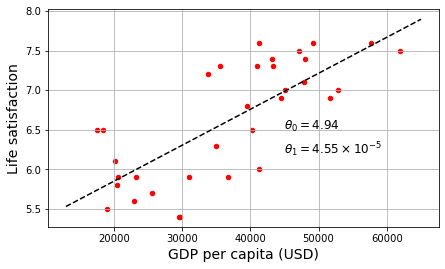

In [46]:
country_stats.plot(kind='scatter', figsize=(7,4), grid=True,  x='GDP per capita (USD)', y='Life satisfaction', color='red')
X = np.linspace(min_gdp, max_gdp, 500)
plt.plot(X, t0 + t1*X, 'k--')
plt.text(max_gdp -20_000, min_life_sat + 2.5, fr"$\theta_0 = {t0:.2f}$", color='k')
plt.text(max_gdp -20_000, min_life_sat + 2.2, fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color='k')
save_fig('best_fit_model')

In [54]:
cyprus_gdp = gdp_at_year.loc['Cyprus'].values[0]
cyprus_gdp

33932.04914807925

In [59]:
cyprus_predict_lifeSat = lin1.predict([[cyprus_gdp]])[0][0]
cyprus_predict_lifeSat

6.483600142310616

In [60]:
missing_data = full_country_stats[
    (full_country_stats["GDP per capita (USD)"] < min_gdp) |
    (full_country_stats['GDP per capita (USD)'] > max_gdp)
]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
Colombia,10961.897571,6.3
South Africa,11250.144917,4.7
Brazil,12921.597170,6.4
Luxembourg,97394.470804,6.9


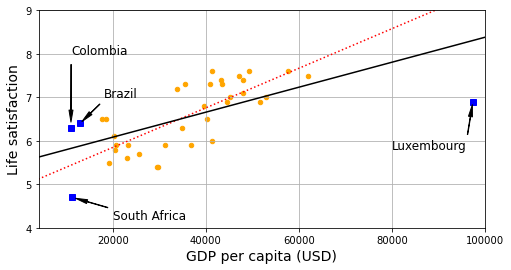

In [121]:
position_text_missing_country = {
    "Colombia" : (11_000, 8),
    'South Africa' : (20_000, 4.2),
    'Brazil' : (18_000, 7.0),
    'Luxembourg' : (80_000, 5.8)
}

full_country_stats.plot(
    kind='scatter', figsize=(8,4), x='GDP per capita (USD)', y="Life satisfaction", color='orange', grid=True
)

for country, pos_text in position_text_missing_country.items() :
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(
        text=country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
        arrowprops=dict(facecolor='k', width=0.4, shrink=0.08, headwidth=4)
    )
    plt.plot(pos_data_x, pos_data_y, 'bs')

# normal
X = np.linspace(0, 115_000, 500)
plt.plot(X, t0 + t1*X, 'r:')

# with missing country
lin2 = linear_model.LinearRegression()
xfull = full_country_stats['GDP per capita (USD)'].values.reshape(-1,1)
yfull = full_country_stats['Life satisfaction'].values.reshape(-1,1)
lin2.fit(xfull, yfull)
t0f, t1f = lin2.intercept_[0], lin2.coef_[0][0]
X = np.linspace(0, 115_000, 500)
plt.plot(X, t0f + t1f*X, 'k')
plt.axis([4_000, 100_000, 4, 9])
save_fig('full data scatterplot')

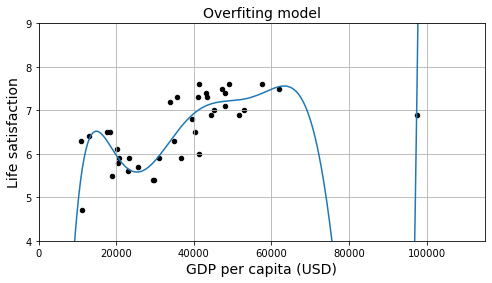

In [147]:
from sklearn import preprocessing, pipeline

full_country_stats.plot(
    kind='scatter', figsize=(8,4), x='GDP per capita (USD)', y='Life satisfaction',grid=True, color='k'
)

poly_func = preprocessing.PolynomialFeatures(degree=7, include_bias=False)
std_scaler = preprocessing.StandardScaler()
lin_reg = linear_model.LinearRegression()

pipe_reg = pipeline.Pipeline([
    ('ploy', poly_func),
    ('scaler', std_scaler),
    ('linear', lin_reg)
])

pipe_reg.fit(xfull, yfull)
curve = pipe_reg.predict(X.reshape(-1,1))
plt.plot(X, curve)
plt.axis([0, 115_000, 4, 9])
plt.title('Overfiting model')
save_fig('Overfitting model')